In [52]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()
import numpy as np 
import pandas as pd 

outcome_path = "experiment_outcome_cornell/"


schemes = ["ber", "cr", "rer", "psr", "dp", "pair", "cov"]

In [83]:
# data = []
# gammas = [0.5, 1, 2]

# resolutions = [2, 5, 10]

# res = resolutions[2]


# # select clustering resolution
# outcome_files = os.listdir(outcome_path)
# outcome_files = [x for x in outcome_files if "res{}".format(res) in x]

In [89]:
dataset_name = "FB-Cornell5"

resolutions = [2, 5, 10]
# data = []
gammas = [0.5, 1, 2]
metrics = ["Bias", "Std", "MSE"]
estimators = ["HT", "DIM", "DIM"]
model_name_dict = {"linear":"linear", "multi":"multiplicative"}


for res in resolutions:
    data = []
    outcome_files = os.listdir(outcome_path)
    outcome_files = [x for x in outcome_files if "res{}".format(res) in x]
    for fname in outcome_files:
        if "linear" in fname:
            model_type = "linear"
        elif "multi" in fname:
            model_type = "multi"
        else:
            continue
        gamma = float(fname[fname.find("gamma")+5:fname.find("gamma")+8])
        with open(outcome_path + fname) as f:            
            x = f.readlines()
            x = [line.strip() for line in x]
            i = 0
            while i < len(x):
                if "GATE" in x[i]:
                    i += 1
                    continue
                if x[i] in schemes:
                    scheme = x[i]
                    for j in range(1, 4):
                        metric_values = []
                        for metric_name in metrics:                        
                            metric_line = x[i+j]            
                            metric_loc = metric_line.find(metric_name) + len(metric_name) + 2
                            metric_value = float( metric_line[metric_loc : metric_loc + 6] ) # keep 4 decimal places
                            metric_values.append(metric_value)                    
                        data.append([
                            scheme, model_type, gamma, j, *metric_values
                        ])                    
                    i += 3                            
                i += 1   

    df = pd.DataFrame(data, columns= ["method", "model_type", "gamma", "estimator", "Bias", "SD", "MSE"])                        
    df.method = df.method.map({
        "rer" : "ReAR",
        "psr" : "PSR", 
        "dp" : "IBR",
        "pair" : "IBR-p",
        "cov" : "OCD",
        "ber" : "Ber",
        "cr" : "CR"    
    })

    for est in [1,3]:
        df1 = df.query("estimator=={}".format(est))
        df1.drop("estimator", axis=1, inplace=True)
        df1.SD = df1.SD.map(lambda x: round(x, 3))
        df1.MSE = df1.MSE.map(lambda x: round(x, 3))
        
        for model in ["linear", "multi"]:
            row_ind = pd.MultiIndex.from_product([df1.method.unique(), ], names=["method",  ])
            col_ind = pd.MultiIndex.from_product([[0.5, 1.0, 2.0], ["Bias", "SD", "MSE"]], names=["gamma", "metric"])
            num_row = len(row_ind)
            num_col = len(col_ind)
            data = np.zeros((num_row, num_col))
            for i in range(num_row):
                met = row_ind[i][0]
                for j in range(num_col):        
                    gam, metric = col_ind[j]        
                    value = df1.query("method == @met and gamma == @gam and model_type == @model")[metric]
                    try:
                        data[i][j] = value
                    except TypeError:
                        print(value)
            table_df = pd.DataFrame(data, index=row_ind, columns=col_ind)
            
            table_df.to_latex("tables_cor/{}_{}_res{}.tex".format(model, estimators[est-1], res), bold_rows=True, multicolumn_format="c",
                caption= "Simulation results of \\textbf{{{}}} estimator under \\textbf{{{}}} model with resolution \\textbf{{{}}} on {}".format(estimators[est-1], model_name_dict[model], res, dataset_name),
                column_format="lccccccccc", sparsify=True
                )

In [87]:
print("\\textbf{{{}}} ".format(1))

\textbf{1} 


In [68]:
est = 3



In [58]:
table_df.to_latex?

Signature:
table_df.to_latex(
    buf: 'FilePath | WriteBuffer[str] | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    col_space: 'ColspaceArgType | None' = None,
    header: 'bool_t | Sequence[str]' = True,
    index: 'bool_t' = True,
    na_rep: 'str' = 'NaN',
    formatters: 'FormattersType | None' = None,
    float_format: 'FloatFormatType | None' = None,
    sparsify: 'bool_t | None' = None,
    index_names: 'bool_t' = True,
    bold_rows: 'bool_t' = False,
    column_format: 'str | None' = None,
    longtable: 'bool_t | None' = None,
    escape: 'bool_t | None' = None,
    encoding: 'str | None' = None,
    decimal: 'str' = '.',
    multicolumn: 'bool_t | None' = None,
    multicolumn_format: 'str | None' = None,
    multirow: 'bool_t | None' = None,
    caption: 'str | tuple[str, str] | None' = None,
    label: 'str | None' = None,
    position: 'str | None' = None,
) -> 'str | None'
Docstring:
Render object to a LaTeX tabular, longtable, or nested table.

Requ

In [ ]:
table_df.to_latex("{}_dim.tex".format(model), bold_rows=True, multicolumn_format="c")


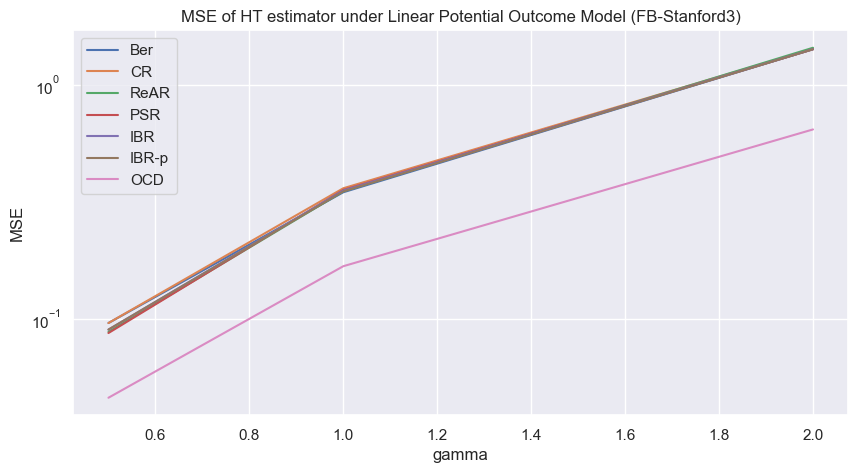

In [48]:
import seaborn as sns;sns.set()

methods = df1.method.unique()

metric = "MSE"
model = "linear"


fig = plt.figure(figsize=(10,5))

for met in methods:
    g = sns.lineplot(x = [0.5, 1.0, 2.0], y = df1.query("model_type==@model and method==@met").sort_values(by="gamma")[metric].values, label=met)
    g.set(yscale='log')

plt.xlabel("gamma")
plt.ylabel("MSE")
plt.title("MSE of HT estimator under Linear Potential Outcome Model (FB-Stanford3)")
plt.savefig("ht_linear.pdf")

In [97]:
# multi_df.to_excel("experiment_{}.xlsx".format(model))
# multi_df.to_latex("{}.tex".format(model))

In [175]:
linear_df.style.to_latex("table.tex")